In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

from PatchTST_supervised.utils.metrics import metric, MAE, MAPE

In [2]:
def data_inverse(label_c, original_dimension, original_position, scaler): #original dimensino(2D) without the label_c column
    temp_matrix = np.full(original_dimension, 0, np.float32)
    temp_matrix = np.insert(temp_matrix, original_position, label_c, axis=1)
    return scaler.inverse_transform(temp_matrix)[:, original_position]

In [3]:


scaler_path = r'scaler\hsi_index_pct_spec_s\hsi_index_pct_spec_s_7_1.pkl'



path_common = r'results\hsi_index_pct_spec_s_7_1_EcmP_stock_custom_ftMS_sl7_ll2_pl1_dm128_dp32_pl5_nh4_el2_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_dcomp1'

metrics_path = path_common + r'\metrics.npy'

pred_path = path_common + r'\pred.npy'

true_path = path_common + r'\true.npy'


# metrics_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\metrics.npy'

# pred_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\pred.npy'

# true_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\true.npy'




#load scaler
scaler = None

with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)


n_column = (scaler.n_features_in_) - 1


metrics = np.load(metrics_path, allow_pickle=True)
print(metrics)

pred_raw = np.load(pred_path)
pred_raw = pred_raw.reshape((pred_raw.shape[0]))
pred = data_inverse(pred_raw, (pred_raw.shape[0], n_column), n_column, scaler)
print(pred_raw[:10])
print(pred[:10])
print(pred.shape)
print(pred_raw.shape)

true_raw = np.load(true_path)
true_raw = true_raw.reshape((true_raw.shape[0]))
true = data_inverse(true_raw, (true_raw.shape[0], n_column), n_column, scaler=scaler)
print(true_raw[:10]) 
print(true[:10])
print(true.shape)
print(true_raw.shape)



[0.11616037 0.02507495 0.15835072 0.11326873 0.21939768 0.1887216
 0.14999619]
[1.3953074 1.500163  1.7894278 1.4914268 1.3803093 1.1559927 1.1337284
 1.1463288 1.0175734 1.2113347]
[25325.027 25544.53  26150.07  25526.242 25293.63  24824.053 24777.445
 24803.822 24534.29  24939.904]
(512,)
(512,)
[1.5082219 1.7908994 1.4055887 1.3593613 1.2373964 1.1051552 1.1502538
 1.0420507 1.23034   1.4387645]
[25561.4  26153.15 25346.55 25249.78 24994.46 24717.63 24812.04 24585.53
 24979.69 25416.  ]
(512,)
(512,)


c:\Users\Vincent\.conda\envs\Pytorch_1_11\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
mae = MAE(pred, true)
mape = MAPE(pred, true)


In [5]:
print("MAE : {}".format(mae))
print("MAPE : %.10f"%(mape))

MAE : 243.16720581054688
MAPE : 0.0093548037


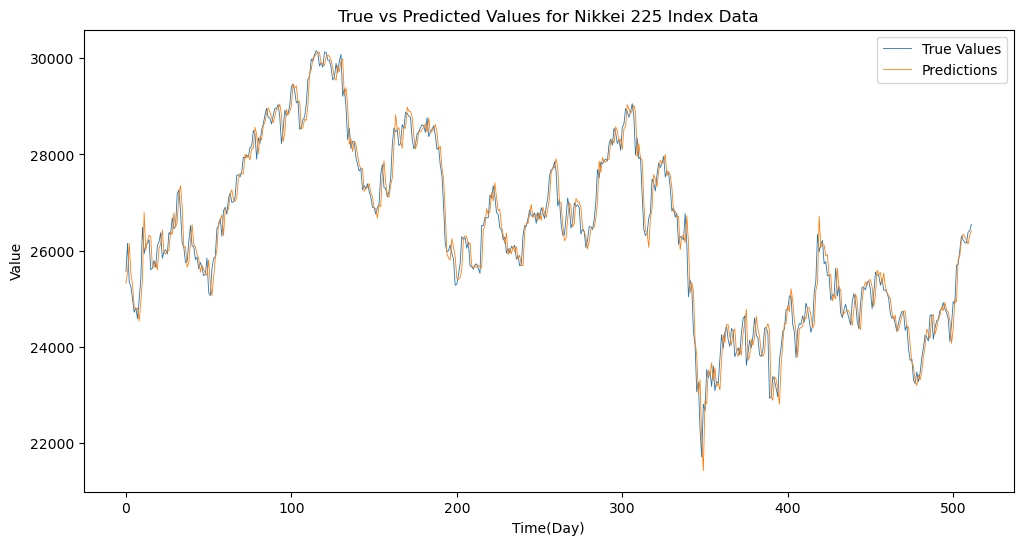

In [6]:
import matplotlib.pyplot as plt

time_axis = np.arange(len(pred))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true, label='True Values', linewidth=0.6)
plt.plot(time_axis, pred, label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for Nikkei 225 Index Data')
plt.legend()

plt.show()

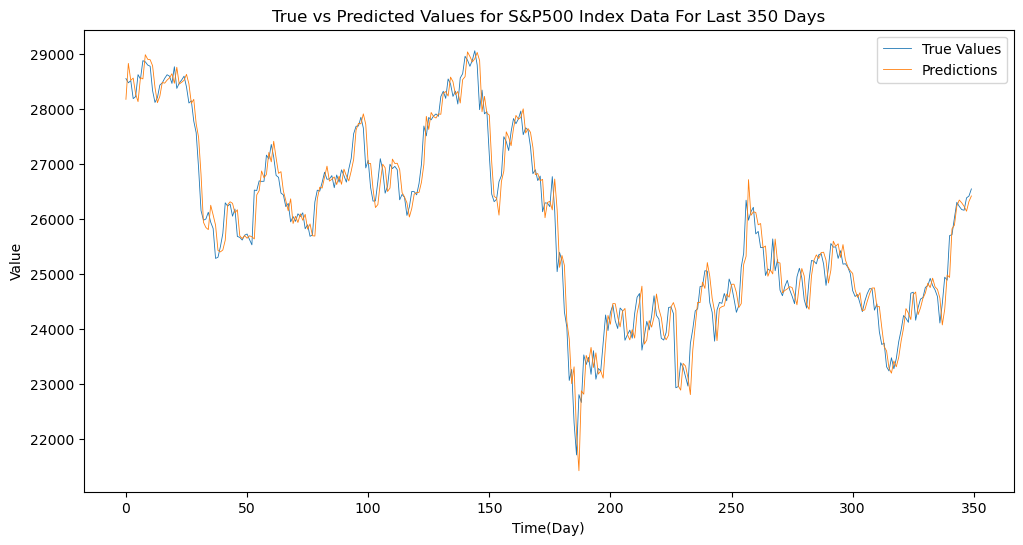

In [7]:
import matplotlib.pyplot as plt

last_value = 350


time_axis = np.arange(len(pred[-last_value:]))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true[-last_value:], label='True Values', linewidth=0.6)
plt.plot(time_axis, pred[-last_value:], label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for S&P500 Index Data For Last {} Days'.format(last_value))
plt.legend()

plt.show()

In [8]:
type(mae)

numpy.float32

In [9]:
type(pred_raw)

numpy.ndarray

In [23]:
import torch 

print(type(torch.tensor(5).double()))

print((torch.tensor(5).double()).dtype)

print(torch.Tensor([5.23, 24.32]).dtype)

torch.Tensor([5.23, 24.32]).to('cuda')


<class 'torch.Tensor'>
torch.float64
torch.float32


tensor([ 5.2300, 24.3200], device='cuda:0')